Instructions for JupyterLab
---

To execute a cell in JupyterLab, press ``shift`` + ``return``. The content may take about 45 - 50 minutes to finish. Use the first set if you need some refresher.

First make sure you use ``SageMath`` instead of regular Python. To change it follow the instructions below. 

![image1](./photos/kernel-icon.png)
![image2](./photos/kernel-pic1.png)
![image3](./photos/kernel-pic2.png)



Goal
----

This activity sheet aims at getting used to computer algebra software. There are many good choices such as SageMath (the one we are using), Singular, and Macaulay2.

Here is a link to [Sagemath webpage](https://www.sagemath.org).

The current IDE is called [JupyterLab](https://jupyter.org) and the school server is provided by the CSUSB's [high-performance computing program](https://www.csusb.edu/academic-technologies-innovation/xreal-lab-and-high-performance-computing/high-performance-computing).

At the end of the notes, you will be asked a few questions and submit your answers to Canvas. We will mainly focus two items. 

1. How to describe $R_\sigma$ as a quotient of a polynomial ring. That is to find the generators of the ideal $I$ such that $R_\sigma \cong \mathbb{C} [x_1,\dots, x_k]/I$.
1. How to remove singularities of $R_\sigma$ whe $\sigma$ is a strongly convex rational polyhedral cone of dimension two in $\mathbb{R}^2$.

--- 
Review of the process $\sigma \to \sigma^\vee \to S_\sigma \to R_\sigma$.

In [6]:
# Here is a cone generated by e_2, 2e_1-e_2
# We understand this cone very well. 
# Its dual cone is generated by e_1^* and e_1^* + 2e_2^*;
# the semigroup is generated by e_1^*, e_1^* + e_2^*, and e_1^* + 2e_2^*;
# the ring is isomorphic to C[x,y,z]/(xz-y^2)
sigma = Cone([(0,1),(2,-1)])
sigma.rays()

N(0,  1),
N(2, -1)
in 2-d lattice N

In [7]:
# dual cone and its generators
sigma_dual = sigma.dual()
sigma_dual.rays()

M(1, 0),
M(1, 2)
in 2-d lattice M

In [8]:
# Generators of S_\sigma
sigma_dual.semigroup_generators() 

M(1, 1),
M(1, 0),
M(1, 2)
in 2-d lattice M

In [10]:
# We can write code to convert a semigroup to a ring, 
# Indeed SageMath has AffineToricVariety package. 
# It treats X_\sigma = Spec(R_\sigma) and \sigma at the same time
# see this link https://doc.sagemath.org/html/en/reference/schemes/sage/schemes/toric/variety.html#sage.schemes.toric.variety.ToricVariety_field.Spec for more information 
X = AffineToricVariety(sigma) # the input is the cone not its dual!
X

2-d affine toric variety

In [11]:
# To find R_\sigma use the following
X.Spec()

Spectrum of Quotient of Multivariate Polynomial Ring in z0, z1, z2 over Rational Field by the ideal (-z0*z1 + z2^2)

In [14]:
# Well, the names z_.. may confuse us. Let's use x,y,z instead
X.Spec(names='x,y,z')

Spectrum of Quotient of Multivariate Polynomial Ring in x, y, z over Rational Field by the ideal (-x*y + z^2)

### HW problem 1

Use the `AffineToricVariety` and `Spec` to find $R_\sigma$, where $\sigma$ is generated by $e_2, ke_1 - e_2$, where $k \ge 2$. Can you find a pattern?

---

Our second task is to subdivide a cone to resolve the singualrities of affine toric variety. Our goal is to find rays for the cone generated by $e_2, 77e_1 - 50e_2$. 
First let's define the cone and plot it.

N( 0,   1),
N(77, -50)
in 2-d lattice N


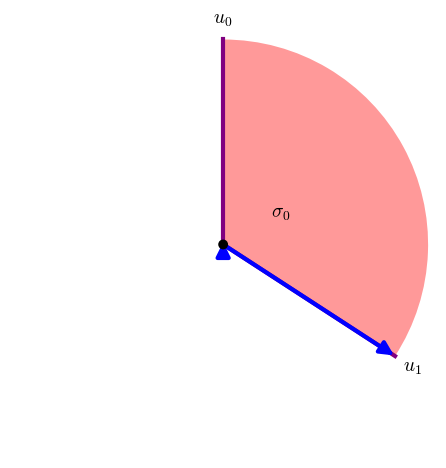

In [19]:
sigma = Cone([[0,1],(77,-50)])
print(sigma.rays())
sigma.plot()

In our first resolution step, we add the ray in direction $e_1 = (1,0)$. Then we apply the 90 degree rotation $\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$ to the bottom cone and apply the transform $\begin{bmatrix} 1 & 0 \\ c & 0 \end{bmatrix}$ with a suitable $c$. 

In terms of numbers, we go though 

> $(1,0) \to (0,1) \to (0,1)$;  
> $(77,-50) \to (50,77) \to (55,-23)$.

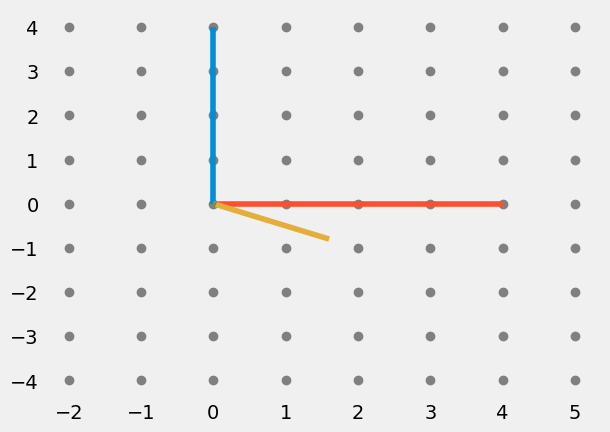

In [43]:
import matplotlib.pyplot as plt
import numpy as np 

rays = [
    (0,1),
    (1,0),
    (2,-1),
    # Add additional rays there; don't forget to put commas at the end (x,y),
    (77,-55),
]

xxx, yyy = np.meshgrid(range(-2,6), range(-4,5))
for x,y in zip(*(xxx,yyy)):
    plt.plot(x,y,'o',color='gray')

plt.style.use('fivethirtyeight')

for x,y in rays:
    scale_factor =  4/( x*x + y*y )
    xx = [ 0, x * scale_factor ]
    yy = [ 0, y * scale_factor ]
    plt.plot(xx,yy,'-')
    
# plt.axis('off')
plt.grid()
# plt.xticks([])
# plt.yticks([])

---

This is the last question of the quiz. Save the file then download it and upload it to Canvas. The file extension should be ``ipynb``. 

See the following image for a reference.

![save-download](./photos/save-download.png)

## Link to the assignment submission page

https://csusb.instructure.com/courses/24717/assignments/360205